In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('round-1-island-data-bottle\\prices_round_1_day_-2.csv',sep = ';')
kelp_df = df[df['product'] == 'KELP']


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
5,-2,100,KELP,2000,5,1999.0,6.0,1998.0,20.0,2002,20,NaN,NaN,NaN,NaN,2001.0,0.0
6,-2,200,KELP,1999,1,1998.0,30.0,NaN,NaN,2002,31,NaN,NaN,NaN,NaN,2000.5,0.0
10,-2,300,KELP,1999,27,NaN,NaN,NaN,NaN,2002,27,NaN,NaN,NaN,NaN,2000.5,0.0
13,-2,400,KELP,1999,20,NaN,NaN,NaN,NaN,2002,20,NaN,NaN,NaN,NaN,2000.5,0.0


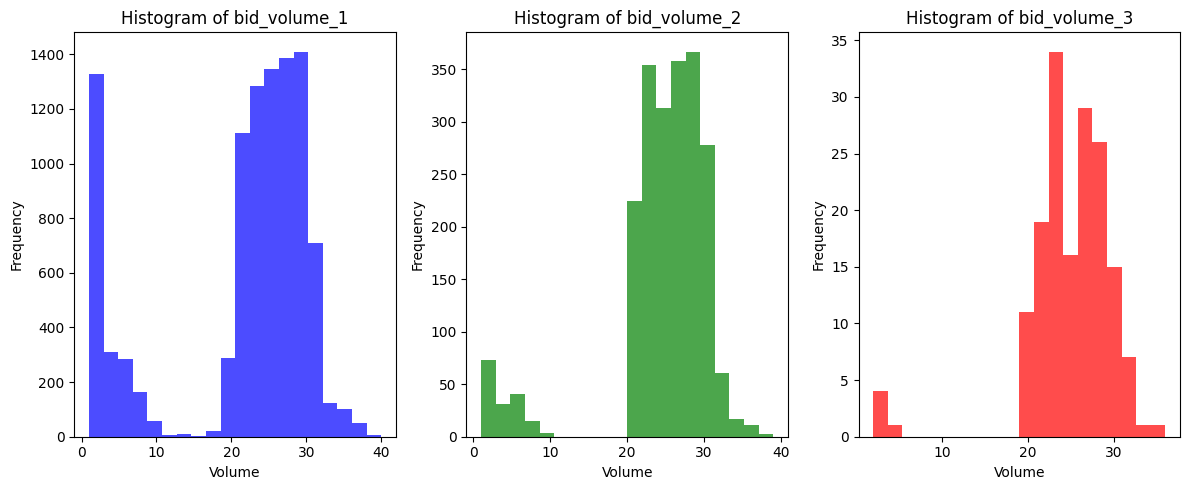

In [10]:
# Create a figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# Plot histogram for bid_volume_1
ax1.hist(kelp_df['bid_volume_1'], bins=20, alpha=0.7, color='blue')
ax1.set_title('Histogram of bid_volume_1')
ax1.set_xlabel('Volume')
ax1.set_ylabel('Frequency')

# Plot histogram for bid_volume_2
ax2.hist(kelp_df['bid_volume_2'], bins=20, alpha=0.7, color='green')
ax2.set_title('Histogram of bid_volume_2')
ax2.set_xlabel('Volume')
ax2.set_ylabel('Frequency')

# Plot histogram for bid_volume_3
ax3.hist(kelp_df['bid_volume_3'], bins=20, alpha=0.7, color='red')
ax3.set_title('Histogram of bid_volume_3')
ax3.set_xlabel('Volume')
ax3.set_ylabel('Frequency')



plt.tight_layout()
plt.show()